#Predicting Ghana's Inflation Rate Using Economic Indicators (1990–2030)
##Project Overview:
####Ghana faces significant inflation fluctuations influenced by exchange rates, GDP trends, and consumer prices. This project builds a machine learning model to predict **Inflation (Consumer Prices Annual %)** for the next **5 years** using historical data.





Data Source: "Ghana Economic Data" CSV

Target Variable: "Inflation, consumer prices (annual %)

Models: XGBoost Regressor

Evaluation Metric: Cross Validation [MAE (Mean Absolute Error)]


##### 1. **IMPORT LIBRARIES**

In [237]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


##### **2. LOAD AND EXPLORE DATASET**

In [238]:

# Load dataset
data = pd.read_csv("/content/Ghana Economic Data1.csv")

# Preview first 20 rows of dataset
data.head(20)

,Year,GDP per capita (current US$),GDP (current US$),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Consumer Price Index,"Official exchange rate (LCU per US$, period average)"
0,1960,177.087737,1223943662,NaN,NaN,NaN,0.000071
1,1961,184.252892,1309859155,NaN,3.470850,NaN,0.000071
2,1962,190.922152,1390140845,NaN,1.940150,NaN,0.000071
3,1963,207.729324,1549295775,NaN,6.745649,0.001188,0.000071
4,1964,227.853457,1740845070,NaN,9.934816,0.001391,0.000071
5,1965,263.778872,2064788732,26.444785,17.006595,0.001806,0.000071
6,1966,266.598422,2138028169,13.237885,8.152515,0.001771,0.000071
7,1967,212.855271,1748837209,-8.422486,-3.878357,0.001721,0.000086
8,1968,197.984863,1666666667,7.894737,12.616517,0.001934,0.000102
9,1969,227.323021,1961764706,7.317073,11.036817,0.001998,0.000102


In [239]:
# Check data types ("int64" = integers, "float64" = floats)

data.dtypes

,0
Year,int64
GDP per capita (current US$),float64
GDP (current US$),int64
"Inflation, consumer prices (annual %)",float64
"Inflation, GDP deflator (annual %)",float64
Consumer Price Index,float64
"Official exchange rate (LCU per US$, period average)",float64


In [240]:
# Identify columns with missing values
data.isnull().sum()

,0
Year,0
GDP per capita (current US$),0
GDP (current US$),0
"Inflation, consumer prices (annual %)",5
"Inflation, GDP deflator (annual %)",1
Consumer Price Index,3
"Official exchange rate (LCU per US$, period average)",0


##### **3. DATA CLEANING AND PREPROCESSING**

In [241]:
# Fill missing values with mean for key inflation-related columns

data[['Inflation, consumer prices (annual %)', 'Inflation, GDP deflator (annual %)', 'Consumer Price Index']]=data[['Inflation, consumer prices (annual %)', 'Inflation, GDP deflator (annual %)', 'Consumer Price Index']].fillna(data[['Inflation, consumer prices (annual %)', 'Inflation, GDP deflator (annual %)', 'Consumer Price Index']].mean())

In [242]:
# Rename columns for better readability

data = data.rename(columns = {'GDP per capita (current US$)':'GDP Per Capita (Current US$)', 'GDP (current US$)':'GDP (Current US$)',
       'Inflation, consumer prices (annual %)':'Inflation Consumer Prices (Annual %)',
       'Inflation, GDP deflator (annual %)':'Inflation GDP Deflator (Annual %)', 'Consumer Price Index':'Consumer Price Index (CPI)',
       'Official exchange rate (LCU per US$, period average)':'Exchange Rate'} )

In [243]:
# Review cleaned dataset

data.head(75)

,Year,GDP Per Capita (Current US$),GDP (Current US$),Inflation Consumer Prices (Annual %),Inflation GDP Deflator (Annual %),Consumer Price Index (CPI),Exchange Rate
0,1960,177.087737,1223943662,27.168248,26.287290,85.900728,0.000071
1,1961,184.252892,1309859155,27.168248,3.470850,85.900728,0.000071
2,1962,190.922152,1390140845,27.168248,1.940150,85.900728,0.000071
3,1963,207.729324,1549295775,27.168248,6.745649,0.001188,0.000071
4,1964,227.853457,1740845070,27.168248,9.934816,0.001391,0.000071
...,...,...,...,...,...,...,...
61,2021,2422.085913,79524421861,9.971089,12.106102,336.490000,5.805700
62,2022,2203.558935,73766052452,31.255895,28.223642,441.670000,8.272400
63,2023,2383.904562,80547146878,38.235765,40.123756,609.975000,11.023400
64,2024,2405.792876,82825288888,23.896543,25.785426,749.340000,8.367100


##### **4. TARGET - FEATURE SELECTION AND MODEL SETUP**

In [244]:
# Define target variable and features

y = data['Inflation Consumer Prices (Annual %)']
features = ['GDP Per Capita (Current US$)', 'GDP (Current US$)', 'Inflation GDP Deflator (Annual %)', 'Consumer Price Index (CPI)', 'Exchange Rate']
X = data[features]

In [245]:
# Create and Initialize XGBoost model with hyperparameters

model = XGBRegressor(n_estimators = 1000,  learning_rate = 0.05, random_state = 0)

In [246]:
# Create pipeline for model

my_pipeline = Pipeline(
    steps =[('model', model)]
          )

##### **5. MODEL TRAINING AND IN-SAMPLE PREDICTIONS**

In [247]:
# Train model on entire dataset

model.fit(X, y)

# Generate predictions on training data
predictions = model.predict(X)

# Add predictions to original dataframe

data["Predicted Inflation"] = predictions

# Compare actual vs predicted values
print(data[["Year", "Inflation Consumer Prices (Annual %)", "Predicted Inflation"]])

    Year  Inflation Consumer Prices (Annual %)  Predicted Inflation
0   1960                             27.168248            27.169092
1   1961                             27.168248            27.167402
2   1962                             27.168248            27.168207
3   1963                             27.168248            27.168184
4   1964                             27.168248            27.167000
..   ...                                   ...                  ...
61  2021                              9.971089             9.971733
62  2022                             31.255895            31.258009
63  2023                             38.235765            38.234406
64  2024                             23.896543            23.896343
65  2025                             25.675736            25.675776

[66 rows x 3 columns]


##### **6. VISUALIZE ACTUAL VS PREDICTED INFLATION (IN-SAMPLE)**

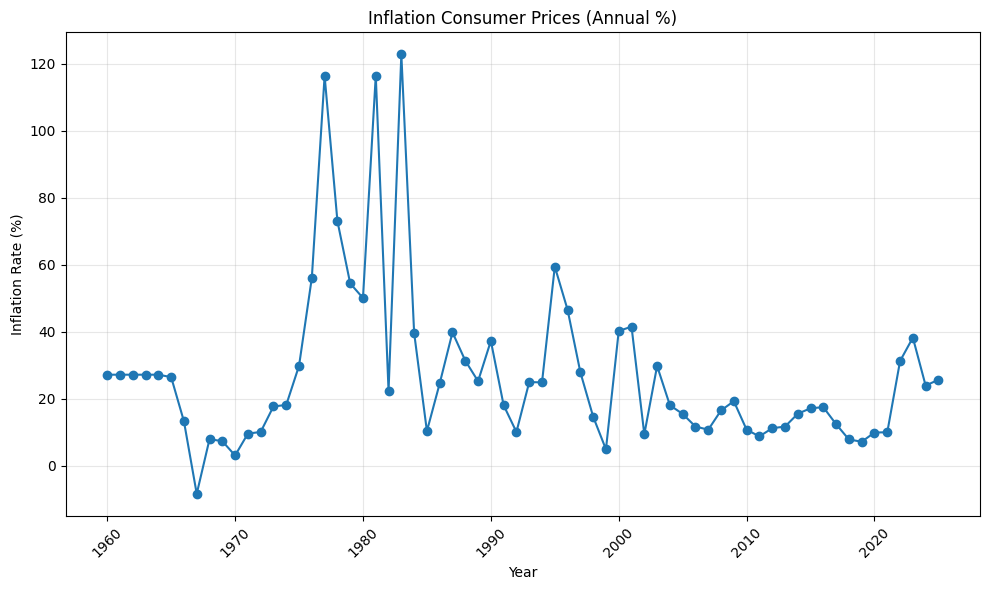

In [248]:
# Plot actual inflation trends over time

plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Inflation Consumer Prices (Annual %)'],
         marker='o')

plt.title('Inflation Consumer Prices (Annual %)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

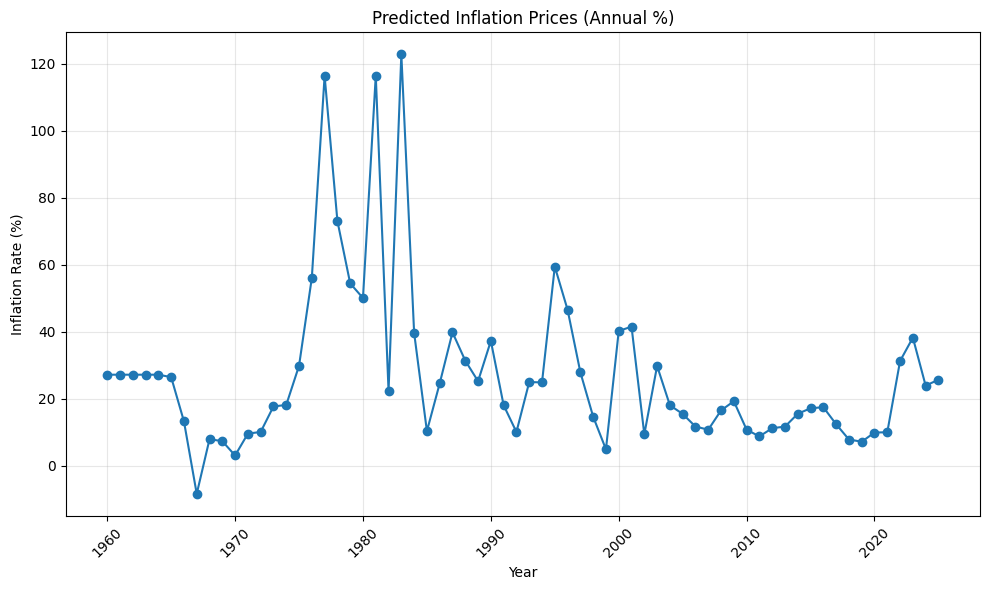

In [249]:
# Plot predicted inflation trends over time

plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Predicted Inflation'],
         marker='o')

plt.title('Predicted Inflation Prices (Annual %)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: The predictions appear very accurate because the model was trained and
tested on the same dataset. This demonstrates the model's ability to learn historical patterns but doesn't indicate true predictive performance on new data

##### **7. MODEL VALIDATION USING CROSS-VALIDATION**

In [250]:
# Perform 10-fold cross-validation and calculate MAE score

scores = -1 * cross_val_score( my_pipeline, X, y, cv = 10, scoring = 'neg_mean_absolute_error')

print("MAE Scores:\n", scores)
print("Average MAE:\n")
print(scores.mean())


MAE Scores:
 [19.27279121 20.19047603 23.70494019 25.01759639  7.4339462  14.76175895
 23.02462499  2.67543178  3.59853774 11.78599152]
Average MAE:

15.146609500396195


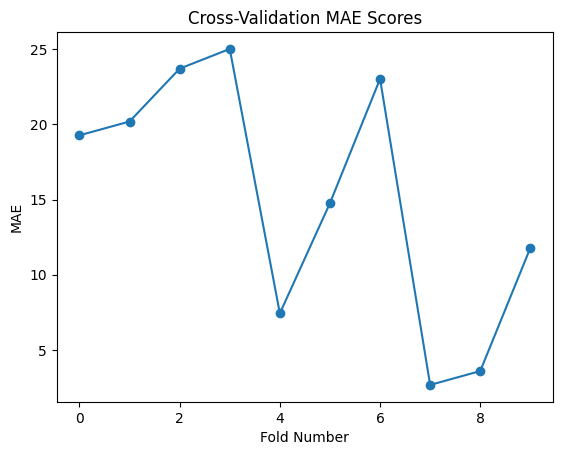

In [251]:
# Visualize cross-validation performance across folds
plt.plot(scores, marker='o')
plt.title("Cross-Validation MAE Scores")
plt.xlabel("Fold Number")
plt.ylabel("MAE")
plt.show()

##### **8. FUTURE PREDICTIONS (2026-2030)**

**Future Feature Estimation:**

The features for 2026-2030 are estimated based on trends from 2020-2025.
These projections are necessary as the model requires feature inputs to make
inflation predictions for future years.


In [252]:
# Create future years dataframe with projected feature values

future_years = pd.DataFrame({
    'GDP Per Capita (Current US$)': [2610.370868, 2701.600146, 2792.829425, 2884.058703, 2975.287981],
    'GDP (Current US$)': [93896037811, 99456386777, 105416735742, 111376985708, 117337235673],
    'Inflation GDP Deflator (Annual %)': [29.133747, 32.266418, 35.399089, 38.531760, 41.664431],
    'Consumer Price Index (CPI)': [586.934000, 639.532000, 692.130000, 744.728000, 797.326000],
    'Exchange Rate': [9.603880, 11.099260, 12.594640, 14.090020, 15.585400]
}, index=[2026, 2027, 2028, 2029, 2030])


print(future_years)


      GDP Per Capita (Current US$)  GDP (Current US$)  \
2026                   2610.370868        93896037811   
2027                   2701.600146        99456386777   
2028                   2792.829425       105416735742   
2029                   2884.058703       111376985708   
2030                   2975.287981       117337235673   

      Inflation GDP Deflator (Annual %)  Consumer Price Index (CPI)  \
2026                          29.133747                     586.934   
2027                          32.266418                     639.532   
2028                          35.399089                     692.130   
2029                          38.531760                     744.728   
2030                          41.664431                     797.326   

      Exchange Rate  
2026        9.60388  
2027       11.09926  
2028       12.59464  
2029       14.09002  
2030       15.58540  


In [262]:
# Make predictions for future years
future_predictions = model.predict(future_years[features])

# Add predictions to the future_years DataFrame
future_years["Predicted Inflation"] = future_predictions

print(future_years)

      GDP Per Capita (Current US$)  GDP (Current US$)  \
2026                   2610.370868        93896037811   
2027                   2701.600146        99456386777   
2028                   2792.829425       105416735742   
2029                   2884.058703       111376985708   
2030                   2975.287981       117337235673   

      Inflation GDP Deflator (Annual %)  Consumer Price Index (CPI)  \
2026                          29.133747                     586.934   
2027                          32.266418                     639.532   
2028                          35.399089                     692.130   
2029                          38.531760                     744.728   
2030                          41.664431                     797.326   

      Exchange Rate  Predicted Inflation  
2026        9.60388            34.230782  
2027       11.09926            34.056541  
2028       12.59464            38.135345  
2029       14.09002            38.135345  
2030       15.5

##### 9. VISUALIZE FUTURE PREDICTIONS

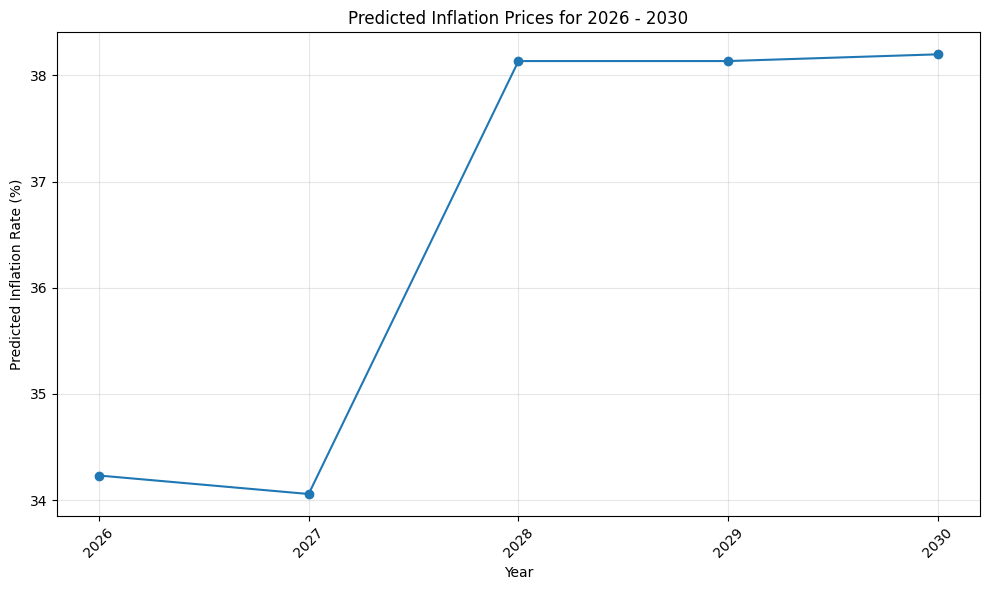

In [264]:
# Plot predicted inflation for 2026-2030

plt.figure(figsize=(10, 6))

# Convert index to integers
plt.plot(future_years.index.astype(int), future_years['Predicted Inflation'],
         marker='o')

plt.title('Predicted Inflation Prices for 2026 - 2030')
plt.xlabel('Year')
plt.ylabel('Predicted Inflation Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(future_years.index.astype(int), rotation=45)
plt.tight_layout()
plt.show()